# 21M.387 Fundamentals of Music Processing
## Problem Set 2: Simpler Classifier

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp

plt.rcParams['figure.figsize'] = (12, 4)
fmp.documentation_button()

## Exercise 1

The following is a continuous-time signal $x_c(t)$.

![](data/ex1a.png)

If $x_c(t)$ is sampled with a periodicity of $T = 0.04$ seconds, thereby creating a discrete-time (DT) signal $x[n]$, what values of $n$ correspond to:  
a)  the first peak value  
b)  the first zero-crossing  


In [6]:
# answer
fs = int(1.0/0.04)
print(f'a) n={int(0.12*fs)}')
print(f'b) n={int(0.84*fs)}')

a) n=3
b) n=21


The following DT signal $x[n]$ was sampled from a continuous signal $x_c(t)$ at a sampling rate of $F_s = 150$Hz. 

![](data/ex1b.png)

When (in seconds) did the following occur in $x_c(t)$:  
a)  the second peak value  
b)  the second zero-crossing  


In [9]:
# answer
fs = 150.0
print(f'a) t={25.0/fs}')
print(f'b) t={13.0/fs}')

a) t=0.16666666666666666
b) t=0.08666666666666667


## Exercise 2

You have an audio signal $x[n]$, sampled at a sampling rate $F_s$. You create an energy feature signal $E^x[n]$ using a centered window length of $N$ and a hop size of $H$. Consider the following parameter choices:  
1. $F_s = 22050, N = 1000, H = 500$
2. $F_s = 44100, N = 1024, H = 441$
3. $F_s = 8000,  N = 2048, H = 256$

For each of these parameters, calculate:
- the feature rate $F_f$ of the energy signal  
- the sampling period of the energy signal  
- the time (in seconds) corresponding to $E^x[300]$.

In [23]:
# answers
pars = [
    (22050, 1000, 500),
    (44100, 1024, 441),
    (8000, 2048, 256)
]

def print_stats(fs, win_len, hop_len):
    # feature rate
    Ff = fs/hop_len
    # sampling period: diff in seconds between two samples; inverse of rate
    s_p = 1/Ff
    # time of E^x[300] assuming no window centering
    Ex_300 = 300 * s_p 
    # account for half window padding at the beginning due to window centering
    pad_secs = (win_len/2.0) * s_p
    
    print(f'Ff={Ff}, sampling period={s_p}, t(E^x[300])={Ex_300 + pad_secs}')
    
for p in pars:
    print_stats(p[0], p[1], p[2])

Ff=44.1, sampling period=0.022675736961451247, t(E^x[300])=18.140589569160998
Ff=100.0, sampling period=0.01, t(E^x[300])=8.120000000000001
Ff=31.25, sampling period=0.032, t(E^x[300])=42.368


## Exercise 3

1. Describe what happens to $E^x[n]$, relatively speaking, when you increase or decrease the hop size $H$.
2. Describe what happens to $E^x[n]$, relatively speaking, when you increase or decrease the window length $L$.
3. What happens if $H > L$


Answers:
1. The number of samples in $E^{x}[n]$ decreases as you increase $H$, increases as you decrease $H$. Overlap between windows increases as you decrease $H$, and vice-versa.
2. $E^{x}[n]$ gets smoother as you increase $L$, rougher/noisier when you decrease it.
3. Parts of the original signal are not included in $E^{x}[n]$, as there's no overlap between windows.

## Exercise 4a

Write the function `find_peaks(x, thresh)`, as described in Lecture, where:  

Inputs:
- `x` is the input signal
- `thresh` is a threshold value $\rho \in [0,1]$  

Output:
- an array of indices $P$ corresponding to the peak locations

Peaks are defined as:
$P = (p_1, p_2, \cdots, p_L)$ where $p_n$ is a peak if:
$$ x[p_n] > x[p_n - 1] \wedge x[p_n] > x[p_n + 1] $$

Additionally, filter out any peaks that are smaller than $ \max(x[n]) \cdot \rho $.

In [138]:
def find_peaks(x, thresh):
    d_prev = np.diff(x[:-1])  # diff with previous element
    d_next = -np.diff(x[-len(x)+1:])  # diff with next element
    idx = np.intersect1d(np.nonzero(d_prev > 0), np.nonzero(d_next > 0)) + 1

    # filter out peaks smaller than max(x[n]) * p
    return [i for i in idx if x[i] > (max(x) * thresh)]

Test your code below and try different threshold values.

thresh=0:


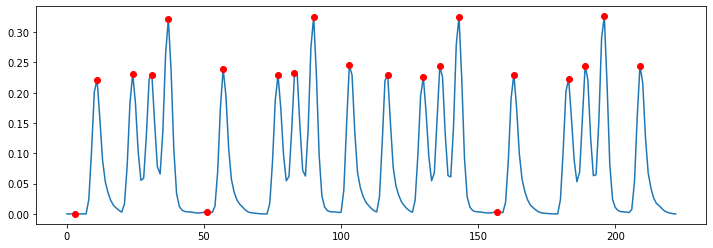

thresh=0.011:


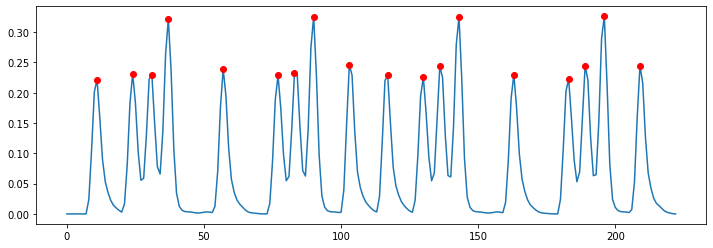

thresh=0.77:


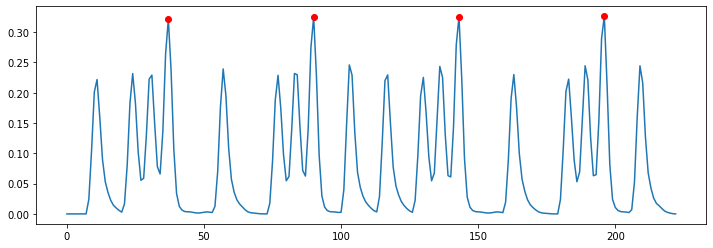

In [203]:
x4 = np.load('data/ex4.npy')

ts = [0, 0.011, 0.77]

for t in ts:
    print(f'thresh={t}:')
    peaks = find_peaks(x4, t)
    plt.figure()
    plt.plot(x4)
    plt.plot(peaks, x4[peaks], 'ro');
    plt.show()

## Exercise 4b

- What value of `thresh` filters out the "garbage" peaks near 0?
- What value of `thresh` returns just the highest peaks?

In [202]:
# answer:
print(f'thresh to filter out "garbage" peaks: {ts[1]}')
print(f'thresh to return just the highest peaks: {ts[2]}')

thresh to filter out "garbage" peaks: 0.011
thresh to return just the highest peaks: 0.77


## Exercise 5

The code below finds the number of zero crossings in a signal. Run the example and see how long it takes to run this code.

In [192]:
def num_zerocrossings_slow(x) :
    count = 0
    for i in range(len(x)-1) :
        if (x[i] > 0 and x[i+1] <= 0) or (x[i] < 0 and x[i+1] >=0):
            count += 1
    return count

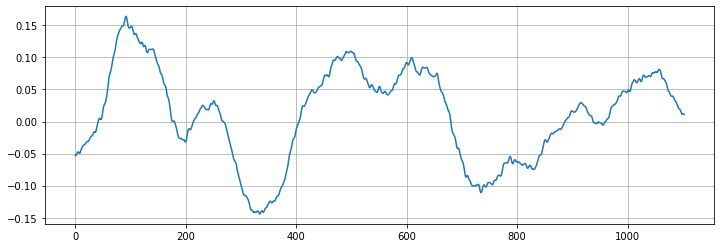

9


In [193]:
x5 = fmp.load_wav('audio/kick_snare.wav', 1.4, 1.45)
plt.plot(x5)
plt.grid()
plt.show()

print( num_zerocrossings_slow(x5) )

In [194]:
%timeit -n200 num_zerocrossings_slow(x5)

962 µs ± 44.5 µs per loop (mean ± std. dev. of 7 runs, 200 loops each)


Write a more optimized version of this function below. How much faster is your optimized version?

Hint1: You can avoid the python `for` loop entirely.  
Hint2: You can think of a zero-crossing as the signal changing sign (from positive to negative or negative to positive). What mathematical operation and inequality test can be used to determine a sign change? 

In [195]:
def num_zerocrossings(x) :
    return len(np.where(np.diff(np.sign(x)))[0])

In [196]:
%timeit -n200 num_zerocrossings(x5)

38 µs ± 9.52 µs per loop (mean ± std. dev. of 7 runs, 200 loops each)


In [207]:
# answer
print(f'answer: new version has avg improvement of {int(962/38)}X over "slow" version.')

answer: new version has avg improvement of 25X over "slow" version.


## Exercise 6

Write the function `calc_zc(x, win_len, hop_size)` to return a zero-crossing feature. It should take as inputs:
- the signal $x$
- the window length $N$
- the hop size $H$

The output should be a _normalized_ zero-crossing feature.  
Make sure that your function uses a _centered window_ by using the zero-padding trick.

In [375]:
def calc_zc(x, win_len, hop_size) :
    # pad the original sound at the beginning to get centered windows:
    x2 = np.pad(x, int(win_len/2), mode='constant')
    M = int(np.ceil(len(x2) / hop_size))
    m = np.zeros(M)
    for i in range(M):
        m[i] = num_zerocrossings(x2[i*hop_size:i*hop_size+win_len])
        
    # normalized
    return m / (M*1.0)

Now listen to the test signal below and plot the zc feature signal generated by your function.

Use $N = 1000$ and $H = 500$.


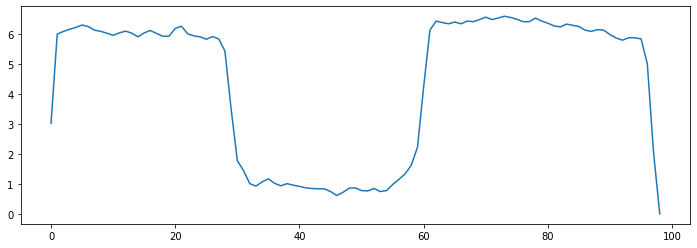

In [379]:
x6 = fmp.load_wav("audio/zc_test.wav")
fs = 22050

zc = calc_zc(x6, 1000, 500)
plt.plot(zc)
plt.show()
ipd.Audio(x6, rate=fs)

## Exercise 7a

Listen to the following piece of audio. It has 4 different types of drum sounds (Kick Drum, Low Tom, High Tom, Snare).

In [218]:
x7 = fmp.load_wav("audio/drum_hits.wav")
fs = 22050
ipd.Audio(x7, rate=fs)

Write the function `calc_onsets(x)` that returns the locations of the onsets in the piece of audio. You can use existing functions for calculating energy, ENF, and finding peaks from lab2 and `fmplib`. Tune the parameters until you get all the onsets without any missing or extra values. Return the list in units of the audio sampling rate $F_s = 22050$ (so, for example, if the first drum hit happend exactly at time = 0.5s, then the `calc_onsets(x)[0] == 11025`) 

Then, plot the waveform and the location of the onsets on the same plot to make sure you got it right.

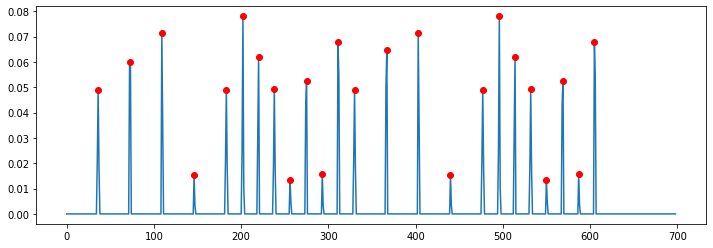

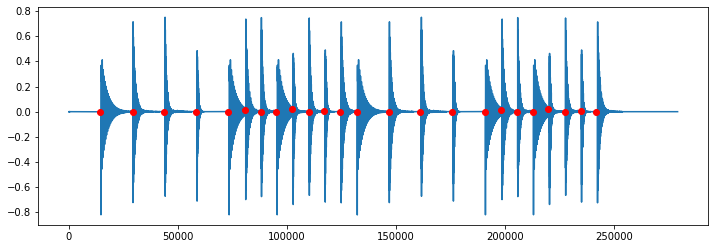

In [301]:
def calc_energy(x, win_len, hop_size):
    # pad the original sound at the beginning to get centered windows:
    x2 = np.pad(x, int(win_len/2), mode='constant')
    M = int(np.ceil(len(x2) / hop_size))
    m = np.zeros(M)
    for i in range(M):
        w = x2[i*hop_size:i*hop_size+win_len]
        m[i] = np.dot(w,w)/len(w)  # avg energy
    return m

def calc_enf(x):
    e = np.diff(x)
    e[e < 0] = 0
    return e

def calc_onsets(x):
    win_len = 800
    hop_size = 400
    
    e = fmp.calc_energy(x, win_len, hop_size)
    enf = calc_enf(e)
    plt.plot(enf)

    xs = find_peaks(enf, 0.1)
    ys = [enf[i] for i in xs]
    plt.plot(xs, ys, 'ro')
    plt.show()

    return np.array(xs) * hop_size

onsets = calc_onsets(x7)
ys = [x7[i] for i in onsets]
plt.plot(x7)
plt.plot(onsets, ys, 'ro')
plt.show()

## Exercise 7b

For the first 4 onsets, plot the waveform of the drum hit, starting from the onset location, and lasting 200 milliseconds


kick:


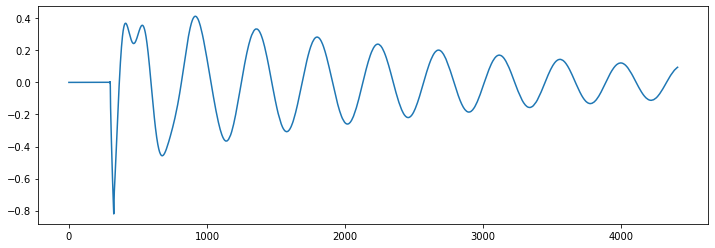


low-tom:


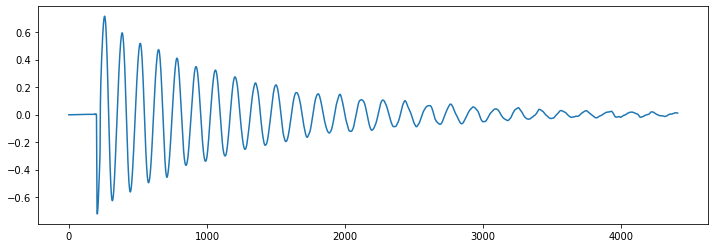


high-tom:


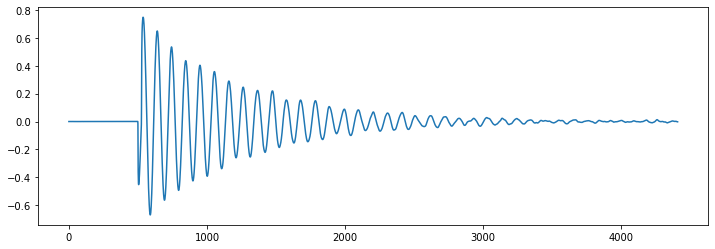


snare:


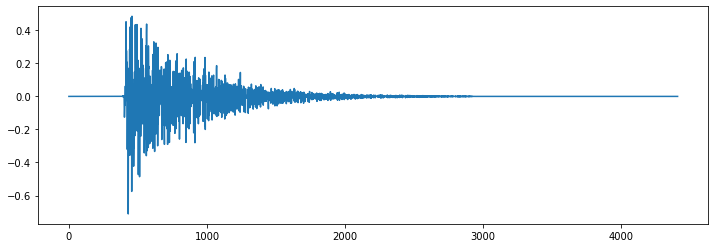

In [297]:
# make plots
d = {0:'kick', 1: 'low-tom', 2: 'high-tom', 3: 'snare'}
for i in range(4):
    j = onsets[i]
    n_len = int(0.2 * fs)
    w = x7[j:j+n_len]
    print(f'\n{d[i]}:')
    plt.plot(w)
    plt.show()
    ipd.display(ipd.Audio(w, rate=fs))

## Exercise 8

Now that you can see what the waveforms looks like, create a classifier that distinguishes between the four different drum types. Use zero-crossing to help you in this task. However note that the zero-crossing feature is unreliable during periods of near-silence. Make your classifier avoid this problem for more accurate results.

Write the function `classify_onsets(x, onsets)`:

Inputs:  
- `x`: the original signal
- `onsets`: the onsets that you calculated in Exercise 6

Outputs:
- a list of integers $(0 <= i < 4)$ that identify the drum type for that onset: {0:kick, 1: low-tom, 2: high-tom, 3: snare} 

In [408]:
# unit 2 class notes
def calc_ave_at_onset(onsets, x, w_len) :
    "for each onset, return the average value of x for a window of length w_len"
    
    # create the output vector
    output = np.empty(len(onsets))

    for i,p in enumerate(onsets):
        output[i] = np.sum(x[p : p+w_len]) / float(w_len)

    return output

def classify_onsets(x, onsets):
    win_len = 2000
    hop_size = 1000
    fs = 22050
    ff = fs / hop_size
    
    # get zero crossings a little after the onset.
    # heuristic: obtained from visually inspecting sound plots Ex7b
    s_off = 500
    s_len = 2000
    
    # {0:'kick', 1: 'low-tom', 2: 'high-tom', 3: 'snare'}
    ave_drums = []
    for i in onsets[0:4]:
        # get zero crossings a little after the onset (heuristics from inspecting plots above)
        zc = calc_zc(x[i+s_off:i+s_off+s_len], win_len, hop_size)
        ave_drums.append(np.dot(zc,zc) / (len(zc)*1.0))
    
    print(ave_drums)

    d_types = [0, 1, 2, 3]
    for i in onsets[4:]:
        # get zero crossings a little after the onset (100ms)
        off = int(0.1 * fs)
        w_len = int(0.2 * fs) 
        zc = calc_zc(x[i+s_off:i+s_off+s_len], win_len, hop_size)
        ave_zc = np.dot(zc,zc) / (len(zc)*1.0)
        idx = np.argmin(np.abs(np.array(ave_drums)-ave_zc))
        print(f'ave_zc={ave_zc},idx={idx}')
        d_types.append(idx)
    
    return d_types

In [409]:
onset_types = classify_onsets(x7, onsets)
print(onset_types)

# plt.plot(x7)
# plt.show()
# ipd.Audio(x7, rate=fs/2)

[2.21875, 17.96875, 36.90625, 23613.15625]
ave_zc=2.21875,idx=0
ave_zc=17.96875,idx=1
ave_zc=36.265625,idx=2
ave_zc=2.21875,idx=0
ave_zc=11827.90625,idx=3
ave_zc=35.0625,idx=2
ave_zc=22770.65625,idx=3
ave_zc=85.46875,idx=2
ave_zc=2.21875,idx=0
ave_zc=19.3125,idx=1
ave_zc=36.90625,idx=2
ave_zc=23756.34375,idx=3
ave_zc=2.21875,idx=0
ave_zc=17.96875,idx=1
ave_zc=36.265625,idx=2
ave_zc=2.21875,idx=0
ave_zc=11827.90625,idx=3
ave_zc=35.0625,idx=2
ave_zc=22816.96875,idx=3
ave_zc=105.71875,idx=2
[0, 1, 2, 3, 0, 1, 2, 0, 3, 2, 3, 2, 0, 1, 2, 3, 0, 1, 2, 0, 3, 2, 3, 2]


## Exercise 9

Now that you have the locations and types of the drums, synthesize an audio track of these drum sounds at the proper locations by writing the function `synthesize_drums(onsets, types)`

Inputs:
- `onsets`: the locations of onsets, as returned by `calc_onsets()`
- `types`: an array of the types of onsets corresponding to `onsets`, as returned by `classify_onsets()`
- Use the `*.snd` sounds below as global variables to generate the synthetic sounds.

Output:
- an audio waveform that can be played with `ipd.Audio()`.

Then, 
- Play that synthesized drum track.
- Compare this to the original track. How did you do?

original:


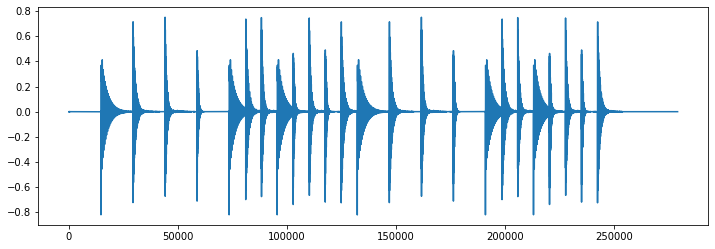

synthesized:


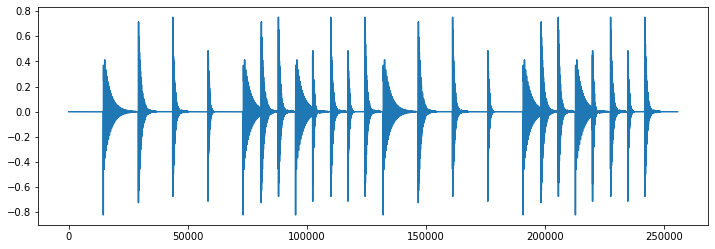

In [410]:
kick_snd = fmp.load_wav('audio/kick.wav')
low_snd = fmp.load_wav('audio/low.wav')
high_snd = fmp.load_wav('audio/high.wav')
snare_snd = fmp.load_wav('audio/snare.wav')

def synthesize_drums(onsets, types):
    fs = 22050

    sounds = [kick_snd, low_snd, high_snd, snare_snd]
    n = onsets[-1] + max([len(s) for s in sounds])
    out = np.zeros(n)
    
    for i in range(len(types)):
        snd = sounds[types[i]]
        out[onsets[i]:onsets[i]+len(snd)] = snd
    
    return out

print('original:')
plt.plot(x7)
plt.show()
ipd.display(ipd.Audio(x7, rate=22050))

print('synthesized:')
synth = synthesize_drums(onsets, onset_types)
plt.plot(synth)
plt.show()
ipd.display(ipd.Audio(synth, rate=22050))

Now use `synthesize_drums()` to create the same drum pattern, but played twice as fast by modifying the locations of the onsets.

In [ ]:
# answer:
